In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #how to install : pip install scikit-learn
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(777) #하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기
import numpy as np
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt


In [2]:
import platform

In [3]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

%matplotlib inline

In [4]:
def load_time_series_data(data, sequence_length):
    print(data.shape)
    print(sequence_length)
    window_length = sequence_length + 1
    x_data = []
    y_data = []
    for i in range(0, len(data) - window_length + 1): #0 1 2 3 4 5 6 7 8 9 | 10
        window = data[i:i + window_length, :]
        x_data.append(window[:-1, :])
        y_data.append(window[-1, [-1]])
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    print(x_data.shape)
    print(y_data.shape)

    return x_data, y_data

In [29]:
import pandas as pd
df = pd.read_pickle('./total_df.pkl')
df
# df.head()

,일시,측정소명,풍향,풍속,온도,습도,강수량,PM
1,2021-01-01 01:00:00,강남,327.0,1.3,-7.0,55.0,0.0,13.0
2,2021-01-01 02:00:00,강남,309.0,1.1,-6.8,55.0,0.0,13.0
3,2021-01-01 03:00:00,강남,45.0,0.9,-7.0,57.0,0.0,12.0
4,2021-01-01 04:00:00,강남,304.0,0.6,-7.5,57.0,0.0,13.0
5,2021-01-01 05:00:00,강남,82.0,0.8,-7.7,60.0,0.0,14.0
...,...,...,...,...,...,...,...,...
529579,2023-09-30 19:00:00,중랑,285.0,1.1,21.7,87.0,0.0,21.0
529580,2023-09-30 20:00:00,중랑,284.0,1.4,21.2,91.0,0.0,26.0
529581,2023-09-30 21:00:00,중랑,279.0,1.2,20.5,89.0,0.0,23.0
529582,2023-09-30 22:00:00,중랑,301.0,1.7,20.2,59.0,0.0,23.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529471 entries, 1 to 529583
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일시      529471 non-null  object 
 1   측정소명    529471 non-null  object 
 2   풍향      529471 non-null  float64
 3   풍속      529471 non-null  float64
 4   온도      529471 non-null  float64
 5   습도      529471 non-null  float64
 6   강수량     529471 non-null  float64
 7   PM      529471 non-null  float64
dtypes: float64(6), object(2)
memory usage: 36.4+ MB


In [22]:
df.describe()

,풍향,풍속,온도,습도,강수량,PM
count,529471.000000,529471.000000,529471.000000,529471.000000,529471.000000,529471.000000
mean,177.875201,1.385832,14.534760,59.420580,0.173498,19.301530
std,103.656219,0.745729,10.949943,20.781416,1.336110,15.785482
min,0.000000,0.000000,-32.900000,0.000000,0.000000,1.000000
25%,91.000000,0.873030,6.200000,44.000000,0.000000,9.000000
50%,173.000000,1.300000,16.000000,59.000000,0.000000,15.000000
75%,268.000000,1.800000,23.700000,76.000000,0.000000,25.000000
max,360.000000,8.100000,38.300000,100.000000,92.500000,237.000000


In [42]:
pvt22 = df.pivot(index = ['일시'], columns = '측정소명', values = 'PM')
pvt22.head()
pvt22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24071 entries, 2021-01-01 01:00:00 to 2023-09-30 23:00:00
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강남      24071 non-null  float64
 1   강동      24071 non-null  float64
 2   강북      24071 non-null  float64
 3   강서      24071 non-null  float64
 4   관악      24071 non-null  float64
 5   광진      24071 non-null  float64
 6   구로      24071 non-null  float64
 7   금천      24071 non-null  float64
 8   노원      24071 non-null  float64
 9   도봉      24071 non-null  float64
 10  동대문     24071 non-null  float64
 11  마포      24071 non-null  float64
 12  서대문     24069 non-null  float64
 13  서초      24071 non-null  float64
 14  성동      24071 non-null  float64
 15  성북      24070 non-null  float64
 16  송파      23983 non-null  float64
 17  양천      24071 non-null  float64
 18  용산      24071 non-null  float64
 19  은평      24071 non-null  float64
 20  중구      24071 non-null  float64
 21  중랑      

In [61]:
pvt22 = pvt22.dropna()
pvt22

측정소명,강남,강동,강북,강서,관악,광진,구로,금천,노원,도봉,...,서대문,서초,성동,성북,송파,양천,용산,은평,중구,중랑
일시,,,,,,,,,,,,,,,,,,,,,
2021-01-04 17:00:00,21.0,20.0,22.333333,19.0,18.0,17.0,19.0,21.000000,27.0,22.0,...,20.0,28.285714,20.0,20.0,29.0,21.0,15.0,18.0,22.0,16.0
2021-01-04 18:00:00,25.0,22.0,21.000000,20.0,21.0,18.0,19.0,24.333333,26.0,19.0,...,19.0,30.142857,20.0,18.0,31.0,27.0,18.0,21.0,24.0,16.0
2021-01-04 19:00:00,27.0,30.0,22.000000,20.0,19.0,23.0,19.0,27.666667,22.0,19.0,...,20.0,32.000000,22.0,16.0,27.0,22.0,19.0,21.0,27.0,16.0
2021-01-04 20:00:00,25.0,36.0,22.000000,20.0,21.0,29.0,21.0,31.000000,27.0,22.0,...,20.0,27.000000,26.0,24.0,32.0,24.0,25.0,23.0,29.0,21.0
2021-01-04 21:00:00,26.0,36.0,23.000000,23.0,21.0,31.0,21.0,24.000000,37.0,27.0,...,26.0,27.000000,27.0,24.0,27.0,26.0,25.0,22.0,28.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30 19:00:00,20.0,7.0,21.000000,12.0,32.0,19.0,5.0,17.000000,25.0,21.0,...,19.0,16.000000,19.0,19.0,16.0,10.0,21.0,23.0,21.0,21.0
2023-09-30 20:00:00,22.0,7.0,23.000000,12.0,38.0,22.0,5.0,20.000000,25.0,23.0,...,26.0,21.000000,20.0,21.0,23.0,10.0,26.0,26.0,21.0,26.0
2023-09-30 21:00:00,23.0,7.0,24.000000,12.0,36.0,22.0,5.0,20.000000,26.0,20.0,...,26.0,21.000000,22.0,22.0,23.0,10.0,25.0,26.0,22.0,23.0


In [71]:
df_group1 = pvt22[['서초','강남','송파','강동']]
# df_group1.info()
df_group1

측정소명,서초,강남,송파,강동
일시,,,,
2021-01-04 17:00:00,28.285714,21.0,29.0,20.0
2021-01-04 18:00:00,30.142857,25.0,31.0,22.0
2021-01-04 19:00:00,32.000000,27.0,27.0,30.0
2021-01-04 20:00:00,27.000000,25.0,32.0,36.0
2021-01-04 21:00:00,27.000000,26.0,27.0,36.0
...,...,...,...,...
2023-09-30 19:00:00,16.000000,20.0,16.0,7.0
2023-09-30 20:00:00,21.000000,22.0,23.0,7.0
2023-09-30 21:00:00,21.000000,23.0,23.0,7.0


In [102]:
df_group1

측정소명,서초,강남,송파,강동
일시,,,,
2021-01-04 17:00:00,28.285714,21.0,29.0,20.0
2021-01-04 18:00:00,30.142857,25.0,31.0,22.0
2021-01-04 19:00:00,32.000000,27.0,27.0,30.0
2021-01-04 20:00:00,27.000000,25.0,32.0,36.0
2021-01-04 21:00:00,27.000000,26.0,27.0,36.0
...,...,...,...,...
2023-09-30 19:00:00,16.000000,20.0,16.0,7.0
2023-09-30 20:00:00,21.000000,22.0,23.0,7.0
2023-09-30 21:00:00,21.000000,23.0,23.0,7.0


In [112]:
df_group1[:].values

array([[28.28571429, 21.        , 29.        , 20.        ],
       [30.14285714, 25.        , 31.        , 22.        ],
       [32.        , 27.        , 27.        , 30.        ],
       ...,
       [21.        , 23.        , 23.        ,  7.        ],
       [21.        , 21.        , 23.        ,  7.        ],
       [12.        , 14.        , 16.        ,  7.        ]])

In [103]:
df_group1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23983 entries, 2021-01-04 17:00:00 to 2023-09-30 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서초      23983 non-null  float64
 1   강남      23983 non-null  float64
 2   송파      23983 non-null  float64
 3   강동      23983 non-null  float64
dtypes: float64(4)
memory usage: 936.8+ KB


In [ ]:
# df = df[df['측정소명'] == '강남']
# data = df[['PM']].to_numpy()
# data

In [113]:
##########데이터 전처리

# df = df[df['측정소명'] == '서초']


# data = df[['PM']].to_numpy()
# print(data.shape)
df_group1_onlypm = df_group1[:].values
df_group1_onlypm

array([[28.28571429, 21.        , 29.        , 20.        ],
       [30.14285714, 25.        , 31.        , 22.        ],
       [32.        , 27.        , 27.        , 30.        ],
       ...,
       [21.        , 23.        , 23.        ,  7.        ],
       [21.        , 21.        , 23.        ,  7.        ],
       [12.        , 14.        , 16.        ,  7.        ]])

In [114]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df_group1_onlypm)
data

array([[0.12632275, 0.14492754, 0.224     , 0.12337662],
       [0.13492063, 0.17391304, 0.24      , 0.13636364],
       [0.14351852, 0.1884058 , 0.208     , 0.18831169],
       ...,
       [0.09259259, 0.15942029, 0.176     , 0.03896104],
       [0.09259259, 0.14492754, 0.176     , 0.03896104],
       [0.05092593, 0.0942029 , 0.12      , 0.03896104]])

In [56]:
# scaler = MinMaxScaler()
# data = scaler.fit_transform(data)
# data

array([[0.08695652],
       [0.08695652],
       [0.07971014],
       ...,
       [0.15942029],
       [0.14492754],
       [0.0942029 ]])

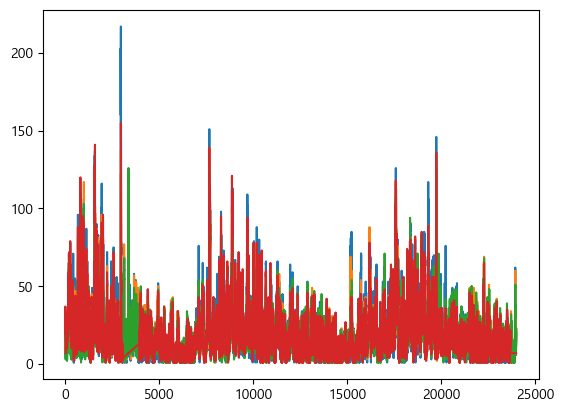

In [115]:
plt.plot(df_group1_onlypm)
plt.show()

In [116]:
# plt.plot(data)
# plt.show()

In [119]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# data = scaler.fit_transform(data)
# data

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_group1_onlypm = scaler.fit_transform(df_group1_onlypm)
df_group1_onlypm

array([[ 0.79365079,  0.35714286,  0.86666667,  0.25      ],
       [ 0.8968254 ,  0.64285714,  1.        ,  0.375     ],
       [ 1.        ,  0.78571429,  0.73333333,  0.875     ],
       ...,
       [ 0.38888889,  0.5       ,  0.46666667, -0.5625    ],
       [ 0.38888889,  0.35714286,  0.46666667, -0.5625    ],
       [-0.11111111, -0.14285714,  0.        , -0.5625    ]])

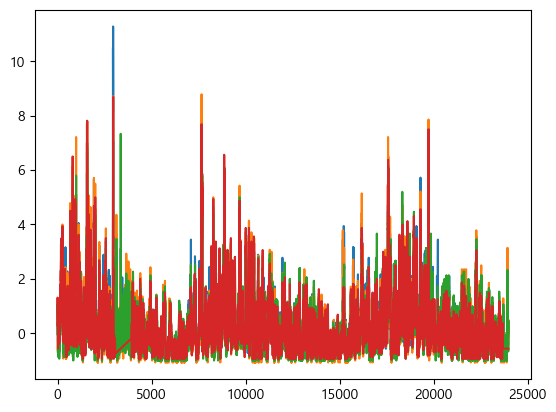

In [118]:
# import matplotlib.pyplot as plt
plt.plot(data)
plt.show()

In [120]:
sequence_length = 3
x_data, y_data = load_time_series_data(df_group1_onlypm, sequence_length)
x_data = x_data.reshape(len(x_data), -1)

x_data.shape, y_data.shape

(23983, 4)
3
(23980, 3, 4)
(23980, 1)


((23980, 12), (23980, 1))

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, shuffle=False) #시각화를 위해 shuffle=False 옵션 사용

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16786, 12), (16786, 1), (7194, 12), (7194, 1))

In [122]:
##########모델 생성

input = tf.keras.layers.Input(shape=(sequence_length,))
net = tf.keras.layers.Dense(units=32, activation='relu')(input)
net = tf.keras.layers.Dense(units=32, activation='relu')(net)
net = tf.keras.layers.Dense(units=1)(net)
model = tf.keras.models.Model(input, net)


model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test)) 

Epoch 1/50


ValueError: in user code:

    File "C:\Users\home\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\home\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\home\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\home\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\home\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\home\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 3), found shape=(None, 12)


In [18]:
def plot(data, y_predict_train, y_predict_test):
    plt.plot(scaler.inverse_transform(data)[:, [-1]].flatten(), label='실제 PM2.5')

    y_predict_train = scaler.inverse_transform(y_predict_train)
    y_predict_train_plot = np.empty_like(data[:, [0]])
    y_predict_train_plot[:, :] = np.nan
    y_predict_train_plot[sequence_length:len(y_predict_train) + sequence_length, :] = y_predict_train
    plt.plot(y_predict_train_plot.flatten(), label='예측 PM2.5')

    y_predict_test = scaler.inverse_transform(y_predict_test)
    y_predict_test_plot = np.empty_like(data[:, [0]])
    y_predict_test_plot[:, :] = np.nan
    y_predict_test_plot[len(y_predict_train) + sequence_length:, :] = y_predict_test
    plt.plot(y_predict_test_plot.flatten(), label='테스트 데이터 예측 PM2.5')

    plt.legend()
    plt.show()

1/1 [==============================] - 0s 35ms/step


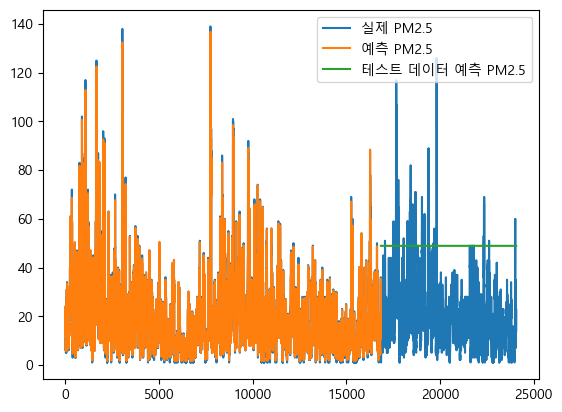

In [33]:
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)
plot(data, y_predict_train, y_predict_test)

In [37]:
x_test = np.array([
        [44, 49, 50]
])
x_test = x_test.reshape(-1, 1)
x_test = scaler.transform(x_test)
x_test = x_test.reshape(1, sequence_length)

y_predict = model.predict(x_test)

y_predict = scaler.inverse_transform(y_predict)
print(y_predict[0][0])

1/1 [==============================] - 0s 42ms/step
48.905224
